# Practical Session - Motifs - Part 2

This practical session is based on what you have learned during the [practical session](https://www.cs.bgu.ac.il/~tabio192/Practical_Sessions) regarding Motifs - part 2.

In this practical session you will:
- Find oriC in *E. coli*
- Find potential DnaA boxes in *E. coli* that underwent mutations


#### How exciting! Let's start!

>Students names: Lev Gourevitch

## 1. Finding the location of oriC in a genome

In the previous part, the oriC was given. But if it is not given, we have to find it ourselves by using a technique we learned in the practical session.

Let's locate the approximate location of oriC inside a genome, by using the **Skew** diagram.
Since we don't know the location of oriC in a circular genome, let's linearize it (i.e., select an arbitrary position and pretend that the genome begins here), resulting in a linear string Genome. 

We define $Skew_i(Genome)$ as the difference between the total number of occurrences of G and the total number of occurrences of C (#G-#C) in the first $i$ nucleotides of Genome. The skew diagram is defined by plotting $Skew_i(Genome)$ (as *i* ranges from 0 to |Genome|), where $Skew_0(Genome)=0$.

**For example:**
$Skew_5(ACAGGTTT)=-1$

### 1.1. Create a skew diagram
- Input: A DNA string **Genome**.
- Output: All values of $Skew_i(Genome)$ among all values of i (from 0 to |Genome|).

**Sample Input:**   
'TAAAGACTGCCGAGAGGCCAACACGAGTGCTA'

**Sample Output:**   
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 2, 3, 2, 1, 1, 1, 0, 0, -1, 0, 0, 1, 1, 2, 1, 1, 1]


In [82]:
def skew_diagram(genome: str):
    l = [0]
    cur = 0
    
    for c in genome:
        if c == 'G':
            cur += 1  
        elif c == 'C':
            cur -= 1
            
        l.append(cur)
    
    return l
        

Test your code

In [83]:
genome = 'TAAAGACTGCCGAGAGGCCAACACGAGTGCTA'
d = skew_diagram(genome)
assert d == [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 2, 3, 2, 1, 1, 1, 0, 0, -1, 0, 0, 1, 1, 2, 1, 1, 1]

This function plots the skew diagram you created

In [84]:
%matplotlib inline 
import matplotlib.pyplot as plt

def plot_skew_diagram(skew_vals):
    plt.title('Skew Diagram')
    plt.xlabel('Position')
    plt.ylabel('Skew')
    plt.plot(skew_vals)

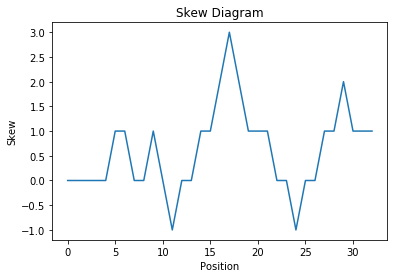

In [85]:
genome = 'TAAAGACTGCCGAGAGGCCAACACGAGTGCTA'
skew_vals = skew_diagram(genome)
plot_skew_diagram(skew_vals)

In the practical session, we saw that the skew is decreasing along the reverse half-strand and increasing along the forward half-strand. Thus, the skew should achieve a minimum at the position where the reverse half-strand ends and the forward half-strand begins, which is exactly the location of oriC!

### 1.2. Minimum Skew Problem: Find a position in a genome where the skew diagram attains a minimum.
- Input: All values of $Skew_i(Genome)$ among all values of i (from 0 to |Genome|)
- Output: All integer(s) i minimizing $Skew_i(Genome)$ among all values of i (from 0 to |Genome|).

**Sample Input:**   
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 2, 3, 2, 1, 1, 1, 0, 0, -1, 0, 0, 1, 1, 2, 1, 1, 1]

**Sample Output:**   
[11, 24]

In [86]:
def minimum_skew(skew_vals):
    skew_min = min(skew_vals)
    return [i for i, val in enumerate(skew_vals) if val == skew_min]
    

Test your code

In [87]:
genome = 'TAAAGACTGCCGAGAGGCCAACACGAGTGCTA'
skew_vals = skew_diagram(genome)

assert minimum_skew(skew_vals) == [11, 24]


### 1.3 Skew diagram of E. coli


4639675


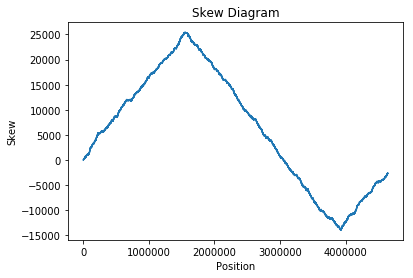

In [88]:
e_coli_genome = open('E_coli.txt').readlines()[0].strip()
print (len(e_coli_genome))
skew_vals = skew_diagram(e_coli_genome)
plot_skew_diagram(skew_vals)


In [89]:
assert minimum_skew(skew_vals) == [3923620, 3923621, 3923622, 3923623]

Solving the **Minimum Skew Problem** now provides us with an approximate location of ori at position **3923620** of **E. coli**.

In [90]:
start_pos = 3923620
e_coli_potential_oric = e_coli_genome[start_pos:start_pos+500]
e_coli_potential_oric

'AATGATGATGACGTCAAAAGGATCCGGATAAAACATGGTGATTGCCTCGCATAACGCGGTATGAAAATGGATTGAAGCCCGGGCCGTGGATTCTACTCAACTTTGTCGGCTTGAGAAAGACCTGGGATCCTGGGTATTAAAAAGAAGATCTATTTATTTAGAGATCTGTTCTATTGTGATCTCTTATTAGGATCGCACTGCCCTGTGGATAACAAGGATCCGGCTTTTAAGATCAACAACCTGGAAAGGATCATTAACTGTGAATGATCGGTGATCCTGGACCGTATAAGCTGGGATCAGAATGAGGGGTTATACACAACTCAAAAACTGAACAACAGTTGTTCTTTGGATAACTACCGGTTGATCCAAGCTTCCTGACAGAGTTATCCACAGTAGATCGCACGATCTGTATACTTATTTGAGTAAATTAACCCACGATCCCAGCCATTCTTCTGCCGGATCTTCCGGAATGTCGTGATCAAGAATGTTGATCTTCAGTG'

## 2. Frequent words in oriC of E. coli

Here is the function from part 1, that locates exact frequent words in a string.

- Input: A string **Text** and integers **k, c**.
- Output: Pairs of k-mers and their reverse compliments in **Text** that apear **c** or more times, and their number of occurrences, without duplications.


In [91]:
from collections import Counter

def reversec(pattern):
    
    reverse_letter = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
        
    return ''.join([reverse_letter[ch] for ch in pattern[::-1]])

def freq_words2(text, k, c):
    result = []
    result_kmers = set()

    words = Counter([text[i:i+k] for i in range(len(text)-k)])
            
    for word, count in words.items():
        reverse_word = reversec(word)
        count_reverse = words[reverse_word] if reverse_word in words else 0
        
        if count + count_reverse >= c and word not in result_kmers:
            result.append((word, count, reverse_word, count_reverse, count+count_reverse))
            result_kmers.add(word)
            result_kmers.add(reverse_word)
            
    return result

We will use this function to find exact words in E. coli oriC

In [92]:
freq_words2(e_coli_potential_oric, 9, 3)

[]

There are **no 9-mers** (along with their reverse complements) that appear **three or more times**!
Even if we have located ori in E. coli, it appears that we still have not found the DnaA boxes that jump-start replication in this bacterium.

Before we give up, we've seen in class that there could be **approximate** occurrences.

## 3. Approximate frequent words
We say that position $i$ in k-mers $p_1 … p_k$ and $q_1 … q_k$ is a mismatch if $p_i \neq q_i$. For example, CGAAT and CGGAC have two mismatches. The number of mismatches between strings *p* and *q* is called the **Hamming distance** between these strings and is denoted $HammingDistance(p, q)$.

### 3.1. Hamming Distance Problem: Compute the Hamming distance between two strings.
- Input: Two strings of equal length.
- Output: The Hamming distance between these strings.

**Sample Input:**  
GGGCCGTTGGT  
GGACCGTTGAC  

**Sample Output:**  
3

In [100]:
def hamming(p, q):
    return sum(1 for _p, _q in zip(p, q) if _p != _q)
    

Test your code

In [101]:
assert hamming('GGGCCGTTGGT','GGACCGTTGAC') == 3

### 3.2. Approximate Pattern Matching

We say that a k-mer $Pattern$ appears as a substring of Text with at most *d* mismatches if there is some k-mer substring $Pattern'$ of Text having *d* or fewer mismatches with Pattern, i.e., $HammingDistance(Pattern, Pattern') \leq d$. Our observation that a DnaA box may appear with slight variations leads to the following generalization of the Pattern Matching Problem.

#### Find all approximate occurrences of a pattern in a string.
- Input: Strings **Pattern** and **Text** along with an integer **d**.
- Output: The number of times that **Pattern** appears as a substring of **Text** with at most **d** mismatches.

**Sample Input:**  
text = CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT  
pattern = ATTCTGGA  
d = 3  

**Sample Output:**  
4

In [102]:
def sliding_window(text, pattern):
    l = len(pattern)
    for i in range(len(text) - l + 1):
        yield text[i: i + l]

def approximate_pattern_matching(text, pattern, d):
    return sum(1 for w in sliding_window(text, pattern) if hamming(pattern, w) <= d)   
    

Test your algorithm:


In [103]:
text = 'CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT'  
pattern = 'ATTCTGGA'  
d = 3  

assert approximate_pattern_matching(text, pattern, d) == 4

### 3.3. Frequent Words with Mismatches and Reverse Complements Problem 

Find the most frequent k-mers (with mismatches and reverse complements) in a string.

Implement an algorithm that runs in $O(4^k|Text|k)$

- Input: A DNA string **Text** as well as integers $k$ and $d$.
- Output: All k-mers $Pattern$ maximizing the sum $Count_d(Text, Pattern)+ Count_d(Text, Pattern_{rc})$ over all possible k-mers.   
The output should be a dictionary that looks like this: {($Pattern$ , $Pattern_{rc}$): $Count_d(Text, Pattern)+ Count_d(Text, Pattern_{rc})$)}

>$Count_d(Text, Pattern)$ is the total number of occurrences of $Pattern$ in $Text$ with at most *d* mismatches.  
>$Pattern_{rc}$ is the reverse compliment of $Pattern$ 

**Sample Input:**   
text = ACGTTGCATGTCGCATGATGCATGAGAGCT  
k = 4  
d = 1  

**Sample Output:**  
{('ACAT', 'ATGT'): 9}

> The function *get_patterns(k)* creates all possible $4^k$ strings, it is given below


In [104]:
CHARS = ['A', 'C', 'G', 'T']

def get_patterns(k):
    patterns = []
    get_patterns_rec(k, '', patterns)
    return patterns

def get_patterns_rec(k, pattern, patterns):
    if k == 0:
        patterns.append(pattern)
        return
    
    for char in CHARS:
        get_patterns_rec(k-1, pattern+char, patterns)

In [105]:
get_patterns(2)

['AA',
 'AC',
 'AG',
 'AT',
 'CA',
 'CC',
 'CG',
 'CT',
 'GA',
 'GC',
 'GG',
 'GT',
 'TA',
 'TC',
 'TG',
 'TT']

> Guidence: the dictionary `result` will contain a tuple as key `(left_pattern, right_pattern)`, and the sum of their counts as a value. The `left_pattern` comes before `right_pattern` in lexicographic order, this can be decided by `min` and `max` functions. See the code below.


In [108]:
def approx_frequent_words1(text, k, d):
    
    result = {}
    apm = lambda ptrn: approximate_pattern_matching(text, ptrn, d)
    
    # get all possible 4^k patterns
    patterns = get_patterns(k)
            
    max_count = 0
    for pattern in patterns:
        
        reverse_pattern = reversec(pattern)
        
        #lexicographical comparison
        left_pattern, right_pattern = min(pattern, reverse_pattern), max(pattern, reverse_pattern)
            
        if (left_pattern , right_pattern) in result:
            continue
            
        res = result[(left_pattern , right_pattern)] = apm(left_pattern) + apm(right_pattern)
        max_count = max(max_count, res)
    
    result = {t: val for t, val in result.items() if val == max_count}
    return result


Test your code


In [110]:
assert approx_frequent_words1('ACGTTGCATGTCGCATGATGCATGAGAGCT', 4, 1) == {('ACAT', 'ATGT'): 9}


{('ACAT', 'ATGT'): 9}


Now let's find fruquent words with mismtaches in the e. coli OriC we extracted

In [111]:
k = 6
d = 1
assert approx_frequent_words1(e_coli_potential_oric, k, d) == {('ATGATC', 'GATCAT'): 25, ('GATCCA', 'TGGATC'): 25}

{('ATGATC', 'GATCAT'): 25, ('GATCCA', 'TGGATC'): 25}


You can see that it takes a while for $k=6$. For a larger and more realistic $k$(=9), it can take a very long time

### 3.4. Efficient implementation of *Frequent Words with Mismatches*

### 3.4.1. Finding neighbors

We want to find these patterns as efficiently as possible. Therefore we will use the algorithm we learned at the practical session.

First, we will need a function for finding neighbors of a pattern. This was already implemented for you.

### Finding neighbors of a pattern
- Input: A DNA pattern and integer d.
- Output: All neighbors of the pattern, with up to d mismatches

**Sample Input:**   
pattern = AC    
d = 1  

**Sample Output:**  
\['AA', 'AC', 'AG', 'AT', 'CC', 'GC', 'TC'\]

In [113]:
def find_neighbors(pattern, d):
    neighbors = []
    chars = ['A', 'C', 'G', 'T']

    find_neighbors_rec(pattern, 0, list(pattern), d, 0, chars, neighbors)
    
    return neighbors

def find_neighbors_rec(pattern, pos, neighbor_lst, d, mismatches, chars, neighbors):
    
    if mismatches > d:
        return
    elif pos == len(pattern):
        neighbors.append(''.join(neighbor_lst))
        return
    
    for char in chars:
        neighbor_lst[pos] = char
        if char != pattern[pos]:
            find_neighbors_rec(pattern, pos+1, neighbor_lst, d, mismatches+1, chars, neighbors)
        else:
            find_neighbors_rec(pattern, pos+1, neighbor_lst, d, mismatches, chars, neighbors)
            

Let's check that it finds all neighbors at distance 1 from 'AC'


In [114]:
d = 1
find_neighbors('AC', d)


['AA', 'AC', 'AG', 'AT', 'CC', 'GC', 'TC']

### 3.4.2. Efficient implementation of *Frequent Words with Mismatches and Reverse Complements Problem*

Now, let's implement an efficient algorithm for *Frequent Words with Mismatches and Reverse Complements Problem*, by using only the neighbors of all k-mers in text as potential patterns. This results in a running time of $𝑶(𝟑^𝒅 𝒌^𝒅 |𝑻𝒆𝒙𝒕|∙𝒌)$

- Input: A DNA string Text as well as integers k and d.
- Output: All k-mers $Pattern$ and their reverse complement maximizing the sum $Count_d(Text, Pattern)+ Count_d(Text, Pattern_{rc})$ over all possible k-mers.

Sample Input:  
text = ACGTTGCATGTCGCATGATGCATGAGAGCT  
k = 4  
d = 1  

Sample Output:  
{('ACAT', 'ATGT'): 9}

#### Psuedo Code

- For each k-mer in Text, find its neighbors and add them to a counter - these are all the potential patterns **(this was already implemented for you)**
- Go over all patterns and return all patterns that maximize $Count_d(Text, Pattern)+ Count_d(Text, Pattern_{rc})$


In [115]:
from collections import Counter

def get_patterns(text, k, d):
    """returns a counter of all neighbors of all k-mers in text"""
    patterns = Counter()
    for i in range(len(text)-k+1):
        pattern = text[i:i+k]
        neighbors = find_neighbors(pattern, d)
        patterns.update(neighbors)
        
    return patterns

def approx_frequent_words2(text, k, d):
    
    result = {}
    apm = lambda ptrn: approximate_pattern_matching(text, ptrn, d)
    
    patterns = get_patterns(text, k, d)
            
    max_count = 0
    for pattern, count in patterns.items():
        
        reverse_pattern = reversec(pattern)
        #lexicographical comparison
        left_pattern, right_pattern = min(pattern, reverse_pattern), max(pattern, reverse_pattern)
            
        #write your code here
        if (left_pattern , right_pattern) in result:
            continue
            
        res = result[(left_pattern , right_pattern)] = apm(left_pattern) + apm(right_pattern)
        max_count = max(max_count, res)
        
    result = {t: val for t, val in result.items() if val == max_count}
    return result


Test your algorithm:

In [120]:
k = 4
d = 1
assert approx_frequent_words2('ACGTTGCATGTCGCATGATGCATGAGAGCT', k, d) == {('ACAT', 'ATGT'): 9}

And now let's use our efficiant algorithm to find all freuquent words with mismatches in e. coli OriC

In [121]:
assert approx_frequent_words2(e_coli_potential_oric, 9, 1) == {('AAGAGATCT', 'AGATCTCTT'): 4,
 ('AAGGATCCT', 'AGGATCCTT'): 4,
 ('AATGATCCG', 'CGGATCATT'): 4,
 ('AGAACAACA', 'TGTTGTTCT'): 4,
 ('AGCTGGGAT', 'ATCCCAGCT'): 4,
 ('AGGATCAAC', 'GTTGATCCT'): 4,
 ('CAGAAGATC', 'GATCTTCTG'): 4,
 ('CCAGGATCC', 'GGATCCTGG'): 4,
 ('CTGTTGATC', 'GATCAACAG'): 4,
 ('CTGGGATCA', 'TGATCCCAG'): 4,
 ('GATCCCAGC', 'GCTGGGATC'): 4,
 ('GGTTATCCA', 'TGGATAACC'): 4,
 ('GTGGATAAC', 'GTTATCCAC'): 4,
 ('TCTGGATAA', 'TTATCCAGA'): 4,
 ('TGATCAACA', 'TGTTGATCA'): 4,
 ('TGTGAATAA', 'TTATTCACA'): 4,
 ('TGTGGATAA', 'TTATCCACA'): 4}

The region which starts 37 nucleotides after position **3923620**, where the skew reaches its minimum value, is experimentally verified oriC of E. coli.

**TTATCCACA** is experimentally confirmed DnaA box in E. coli. along with its reverse complement **TGTGGATAA**.

However, it is not the only one,  there are other 9-mers that appear with their reverse compliment 4 times with 1 mismatch.

## Conclusion

We do not know what purpose — if any — these other 9-mers serve in the E. coli genome, but we do know that there are **many different types of hidden messages** in genomes; these hidden messages have a tendency to cluster within a genome, and most of them have nothing to do with replication. 

One example is the regulatory DNA motifs responsible for gene expression that you studied in the lecture. The important lesson is that existing approaches to oriC prediction remain imperfect and are sometimes inconclusive. However, even providing biologists with a small collection of 9-mers as candidate DnaA boxes is a great aid as long as one of these 9-mers is correct.

Thus, the moral of this chapter is that even though computational predictions can be powerful, bioinformaticians should collaborate with biologists to verify their computational predictions.

## Hope you enjoyed!

### Don't forget to submit to the [submission system](https://cs-serv.cs.bgu.ac.il/cs_service/subsys.html)

